In [15]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import tensorflow as tf
import math

%matplotlib inline

#### 0. 데이터를 가져온다.

+ 코드0-1. dataset을 load 한다.
+ 코드0-2. dataset의 data와 target shape를 출력해본다.
+ 코드0-3. 2번째 feature만 사용해서 input 데이터를 구성하고, label은 전체 target 데이터 모두를 사용한다.
+ 코드0-4. input 데이터와 label 데이터는 각각 전체 데이터에서 -20번째까지 train으로, 나머지는 test로 구성한다.

In [16]:
diabetes = datasets.load_diabetes()

print diabetes.data.shape, diabetes.target.shape

(442, 10) (442,)


In [31]:
x_data = diabetes.data[:,2]
y_data = diabetes.target

x_train = x_data[:-20]
x_test = x_data[-20:]

y_train = y_data[:-20]
y_test = y_data[-20:]

print(x_train.shape)
print(y_train.shape)

(422,)
(422,)


#### 1. 모델을 세운다

+ 모델
    + `h = wx + b`
+ 코드1. 모델에 input 데이터를 넣기 위해 placeholder로 선언한다.
+ 코드2. 모델의 parameter를 Variable로 선언한다.
+ 코드3. 모델의 방정식을 세운다. (using `tf.add` and `tf.multiply`)

In [18]:
x = tf.placeholder(tf.float32, shape=None, name='x-input')
y = tf.placeholder(tf.float32, shape=None, name='y-input')

In [19]:
w = tf.Variable(0, dtype=tf.float32, name="W")
b = tf.Variable(0, dtype=tf.float32, name="w0")

In [20]:
h = tf.add( tf.multiply(x, w), b)

#### 2. 모델의 loss를 계산한 후 minimize 한다

+ 코드4. 평균을 구하기 위해 input 데이터 x의 개수를 구하고, loss를 최소제곱법으로 구한다.
+ 코드5. optimzer 알고리즘을 사용해서 loss를 minimize 한다.

In [36]:
n_samples = tf.cast(tf.size(x), tf.float32)
loss = tf.reduce_sum( tf.pow(h-y, 2)/n_samples*2 )

In [37]:
learning_rate = 0.1
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

#### 4. 모델을 Train 한다

+ 코드9. train_step을 정의한다.
+ 코드10. Session()을 with 절로 선언하고 Variable을 초기화하여 run 한다.
+ 코드11. train_step 만큼 반복문을 선언한다. sess.run으로 출력할 요소는 `v_w_val, v_b_val, y_h_val, loss_val`이다.
+ 코드12. feed를 정의한 다음, `sess.run()`에 fetch할 tensor를 첫 번째 인자로 넣고 두 번째 인자로 feed를 넣는다.

In [38]:
train_step = 10000

with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    
    for i in range(train_step):
        _, v_w_val, v_b_val, y_h_val, loss_val = sess.run(
            [optimizer, w, b, h, loss], 
            feed_dict={x: x_train, y: y_train})
        
        if i % 1000 == 0:
          print('Epoch ', i)
          print('Loss', loss_val)

        if math.isnan(loss_val):
          print('LOSS is NAN!')
          break
            
    # The coefficients
    print('Coefficients: \n', v_w_val)
    # The mean squared error
    print("Mean squared error: %.2f" % loss_val )
    
    # Plot outputs
    plt.scatter(x_test, y_test,  color='black')
    test_pred = sess.run(h, feed_dict={x: x_test, y: []})
    plt.plot(x_test, test_pred, color='blue', linewidth=3)

    plt.xticks(())
    plt.yticks(())

    plt.show()

InvalidArgumentError: You must feed a value for placeholder tensor 'x-input_1' with dtype float
	 [[Node: x-input_1 = Placeholder[dtype=DT_FLOAT, shape=<unknown>, _device="/job:localhost/replica:0/task:0/cpu:0"]()]]

Caused by op u'x-input_1', defined at:
  File "/usr/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/usr/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python2.7/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/usr/local/lib/python2.7/dist-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/usr/local/lib/python2.7/dist-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/usr/local/lib/python2.7/dist-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/usr/local/lib/python2.7/dist-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/usr/local/lib/python2.7/dist-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py", line 2718, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py", line 2822, in run_ast_nodes
    if self.run_code(code, result):
  File "/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-18-52e682ed21ba>", line 1, in <module>
    x = tf.placeholder(tf.float32, shape=None, name='x-input')
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/ops/array_ops.py", line 1530, in placeholder
    return gen_array_ops._placeholder(dtype=dtype, shape=shape, name=name)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/ops/gen_array_ops.py", line 1954, in _placeholder
    name=name)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/framework/op_def_library.py", line 767, in apply_op
    op_def=op_def)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/framework/ops.py", line 2506, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/framework/ops.py", line 1269, in __init__
    self._traceback = _extract_stack()

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'x-input_1' with dtype float
	 [[Node: x-input_1 = Placeholder[dtype=DT_FLOAT, shape=<unknown>, _device="/job:localhost/replica:0/task:0/cpu:0"]()]]


## Answer

(442, 10)
(442,)
('Epoch ', 0)
('Loss', 14734.323)
('Epoch ', 1000)
('Loss', 2611.0925)
('Epoch ', 2000)
('Loss', 2380.2966)
('Epoch ', 3000)
('Loss', 2233.574)
('Epoch ', 4000)
('Loss', 2140.2976)
('Epoch ', 5000)
('Loss', 2080.9988)
('Epoch ', 6000)
('Loss', 2043.3009)
('Epoch ', 7000)
('Loss', 2019.3347)
('Epoch ', 8000)
('Loss', 2004.0992)
('Epoch ', 9000)
('Loss', 1994.4133)
('Coefficients: \n', 840.81946)
Mean squared error: 1988.26


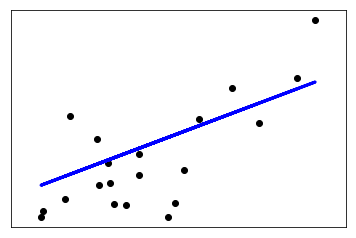

In [35]:
#################
### Perceptron for linear regression
#################
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import tensorflow as tf
import math

# Load the diabetes dataset
diabetes = datasets.load_diabetes()

# diabetes has two attributes: data, target
print(diabetes.data.shape)
print(diabetes.target.shape)

# diabetes consists of 442 samples 
#with 10 attributes and 1 real target value.

# Use only one feature
diabetes_X = diabetes.data[:, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# define graph
x = tf.placeholder(tf.float32, shape=None, name = 'x-input')
y = tf.placeholder(tf.float32, shape=None, name = 'y-input')

v_weight = tf.Variable(
  0,
  dtype=tf.float32, 
  name = "W")
v_bias = tf.Variable(
  0,
  dtype=tf.float32, 
  name = "w0")

y_h = tf.add( tf.multiply(x, v_weight), v_bias )

n_samples = tf.cast(tf.size(x), tf.float32)
loss = tf.reduce_sum(tf.pow(y_h-y, 2))/(n_samples * 2)

# define optimization function
learning_rate = 0.1
train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)



### Starting sessions
with tf.Session() as sess:
  ## initialize variables
  init = tf.global_variables_initializer()
  sess.run(init)

  max_iter = 10000

  for i in range(max_iter):
    _, v_w_val, v_b_val, y_h_val, loss_val = sess.run(
      [train_step, v_weight, v_bias, y_h, loss], 
      feed_dict={x: diabetes_X_train, y: diabetes_y_train})
    
    if i % 1000 == 0:
      print('Epoch ', i)
      print('Loss', loss_val)

    if math.isnan(loss_val):
      print('LOSS is NAN!')
      break

  # The coefficients
  print('Coefficients: \n', v_w_val)
  # The mean squared error
  print("Mean squared error: %.2f" % loss_val )


  # Plot outputs
  plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
  test_pred = sess.run(y_h, 
    feed_dict={x: diabetes_X_test, y: []})
  plt.plot(diabetes_X_test, test_pred, 
          color='blue', linewidth=3)

  plt.xticks(())
  plt.yticks(())

  plt.show()